# Goodreads descriptive analysis

In [1]:
import gzip
import json
import numpy as np
import pandas as pd
import os
pd.options.display.float_format = '{:,}'.format

import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale=1.8)

RANDOM = 2021

figure_path = '/home/weiss/git/thesis/doc/figures/'

DIR = '/home/weiss/rs_data/goodreads/'

In [2]:
def count_lines(file_name):
    """count number of lines in a given file"""
    print('counting file:', file_name)
    count = 0
    with gzip.open(file_name) as fin:
        for l in fin:
            count += 1
    print('done!')
    return count

In [3]:
#n_book = count_lines(os.path.join(DIR, 'goodreads_books.json.gz'))
#n_work = count_lines(os.path.join(DIR, 'goodreads_book_works.json.gz'))
#n_author = count_lines(os.path.join(DIR, 'goodreads_book_authors.json.gz'))
#n_series = count_lines(os.path.join(DIR, 'goodreads_book_series.json.gz'))

In [4]:
def load_data(file_name, head = 500):
    """Load a given GZIP compressed JSON file"""
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)

            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data

In [5]:
#df_book_stats = pd.DataFrame([n_book, n_work, n_author, n_series], dtype = float,
#                             columns = ['count'],
#                             index = ['# book', '# work', '# author', '# series'])
#print(df_book_stats)

In [6]:
reviews = load_data(os.path.join(DIR, 'goodreads_reviews_dedup.json.gz'))
np.random.choice(reviews)

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'book_id': '22875447',
 'review_id': '071dc23c5f6dac171554033d84750bd8',
 'rating': 5,
 'review_text': 'I think this is a must read for any leader in a modern business. Google has done a lot of things right both in their products and also in how they run their company and build their culture, and this is a fairly detailed account of how they\'ve built an impressive culture, and is written by someone who knows - their head of HR. I\'m a little surprised he told as much as he did - but I suppose it will only help for recruiting. \n Goodreads is now a subsidiary of Amazon, and I have spent significant time learning to integrate the best of Amazons culture with ours. And I\'m happy to say that many - perhaps most - of the best practices listed in the book are also used by Amazon. Things like hiring people smarter than you, hiring committees and having objective people on them, committees to approve promotions, focusing on the two tails, and 

In [7]:
# the relevant file is 'goodreads_interactions.csv'

PATH_IN = os.path.join(DIR, 'goodreads_interactions.csv')
df_interactions = pd.read_csv(PATH_IN)

In [8]:
print('=== first 5 records ===')
print(df_interactions.head())
print(f'size {df_interactions.rating.size}')
print(f'unique users {df_interactions.user_id.unique().size}')
print(f'unique books {df_interactions.book_id.unique().size}')

=== first 5 records ===
   user_id  book_id  is_read  rating  is_reviewed
0        0      948        1       5            0
1        0      947        1       5            1
2        0      946        1       5            0
3        0      945        1       5            0
4        0      944        1       5            0
size 228648342
unique users 876145
unique books 2360650


In [9]:
print('=== Any empty cells ===')
print(df_interactions.isnull().any())

=== Any empty cells ===
user_id        False
book_id        False
is_read        False
rating         False
is_reviewed    False
dtype: bool


In [10]:
print('=== duplicated records ===')
print(df_interactions[df_interactions.duplicated(['user_id', 'book_id'], keep=False)])

=== duplicated records ===
Empty DataFrame
Columns: [user_id, book_id, is_read, rating, is_reviewed]
Index: []


user_id
165733    119777
339532    101295
59545      82114
311008     79168
396456     77057
           ...  
694442         1
694429         1
694424         1
694422         1
828859         1
Length: 876145, dtype: int64


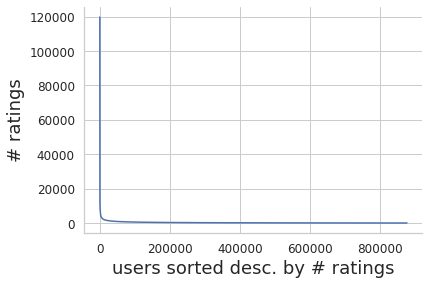

In [11]:
rating_count_by_user = df_interactions.groupby('user_id').size().sort_values(ascending=False)
print(rating_count_by_user)  # contains unrealistic users (way too many ratings)
size = rating_count_by_user.size

df = pd.DataFrame(dict(sorted_user_id=range(1,size+1), rating_counts=rating_count_by_user.values))

sns.set(style='whitegrid', font_scale=1.5, rc={'xtick.labelsize':12, 'ytick.labelsize':12})
image = sns.relplot(data=df,
                    x="sorted_user_id",
                    y="rating_counts",
                    kind="line",
                    height=4,
                    aspect=1.5
                    )

image.set(xlabel="users sorted desc. by # ratings",
          ylabel="# ratings"
          )

image.savefig(figure_path + '/goodreads-long-tail-distribution.png', dpi=300, bbox_inches='tight')

/home/weiss/.conda/envs/GNN/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/weiss/.conda/envs/GNN/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


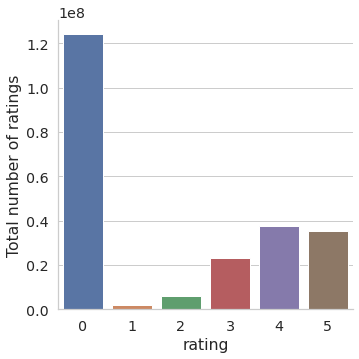

In [12]:
# rating distribution before cleanup

sns.set(style='whitegrid', font_scale=1.3)
g = sns.factorplot("rating", data=df_interactions, kind='count')
g.set_ylabels("Total number of ratings")
g.savefig(figure_path + '/goodreads-rating-distribution-with-null.png', dpi=300, bbox_inches='tight')

In [13]:
print('=== first 5 records ===')
print(df_interactions.head())
print(f'# ratings {df_interactions.rating.size}')
print(f'# users {df_interactions.user_id.unique().size}')
print(f'# books {df_interactions.book_id.unique().size}')

=== first 5 records ===
   user_id  book_id  is_read  rating  is_reviewed
0        0      948        1       5            0
1        0      947        1       5            1
2        0      946        1       5            0
3        0      945        1       5            0
4        0      944        1       5            0
size 228648342
unique users 876145
unique books 2360650


In [14]:
# remove ratings with value 0
df_interactions= df_interactions[df_interactions['rating'] != 0]
df_interactions

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0
...,...,...,...,...,...
228648336,876144,367428,1,3,0
228648338,876144,23847,1,4,0
228648339,876144,23950,1,3,0
228648340,876144,374106,1,5,1


/home/weiss/.conda/envs/GNN/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/weiss/.conda/envs/GNN/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


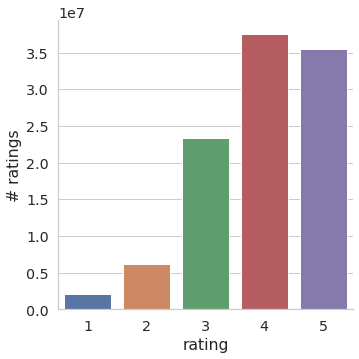

In [15]:
# rating distribution after cleanup
sns.set(style='whitegrid', font_scale=1.3)
g = sns.factorplot("rating", data=df_interactions, kind='count')
g.set_ylabels("# ratings")
g.savefig(figure_path + '/goodreads-rating-distribution.png', dpi=300, bbox_inches='tight')

In [16]:
# Keep entries where the user has rated more than n items and less than m items

n = 50
m = 1000

counts = df_interactions['user_id'].value_counts()
mask = (counts >= n) & (counts <= m)
print(mask.value_counts())
df_interactions = df_interactions[df_interactions['user_id'].isin(mask[mask == True].index)]

True     424154
False    392217
Name: user_id, dtype: int64


In [17]:
print('=== first 5 records ===')
print(df_interactions.head())
print(f'size {df_interactions["rating"].size}')
print(f'unique users {df_interactions["user_id"].unique().size}')
print(f'unique books {df_interactions.book_id.unique().size}')

=== first 5 records ===
   user_id  book_id  is_read  rating  is_reviewed
0        0      948        1       5            0
1        0      947        1       5            1
2        0      946        1       5            0
3        0      945        1       5            0
4        0      944        1       5            0
size 81569320
unique users 424154
unique books 2116340


user_id
222640    1000
67945     1000
128540    1000
20886     1000
362086    1000
          ... 
482643      50
482646      50
54187       50
604658      50
716827      50
Length: 424154, dtype: int64
<class 'pandas.core.series.Series'>
424154


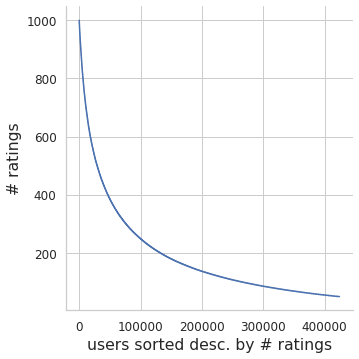

In [18]:
# power law?
rating_count_by_user = df_interactions.groupby('user_id').size().sort_values(ascending=False)
print(rating_count_by_user)
print(type(rating_count_by_user))
size = rating_count_by_user.size
print(size)

df = pd.DataFrame(dict(sorted_user_id=range(1,size+1), rating_counts=rating_count_by_user.values))

sns.set(style='whitegrid', font_scale=1.3, rc={'xtick.labelsize':12, 'ytick.labelsize':12})
image = sns.relplot(data=df,
                    x="sorted_user_id",
                    y="rating_counts",
                    kind="line",
                    )

image.set(xlabel="users sorted desc. by # ratings",
          ylabel="# ratings"
          )


image.savefig(figure_path + '/goodreads-long-tail-distribution-cut.png', dpi=300, bbox_inches='tight')

In [19]:
df_interactions['rating'].mean()

3.946898061673188

In [20]:
df_interactions['rating'].median()

4.0